# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [5]:
cloud_set = ['./weather_data/weather_data/{}'.format(i) for i in os.listdir('./weather_data/weather_data') if 'cloudy' in i]
rain_set = ['./weather_data/weather_data/{}'.format(i) for i in os.listdir('./weather_data/weather_data') if 'rain' in i]
sunrise_set = ['./weather_data/weather_data/{}'.format(i) for i in os.listdir('./weather_data/weather_data') if 'sunrise' in i]
sunshine_set = ['./weather_data/weather_data/{}'.format(i) for i in os.listdir('./weather_data/weather_data') if 'shine' in i]

In [6]:
cloud_set

['./weather_data/weather_data/cloudy1.jpg',
 './weather_data/weather_data/cloudy10.jpg',
 './weather_data/weather_data/cloudy100.jpg',
 './weather_data/weather_data/cloudy101.jpg',
 './weather_data/weather_data/cloudy102.jpg',
 './weather_data/weather_data/cloudy103.jpg',
 './weather_data/weather_data/cloudy104.jpg',
 './weather_data/weather_data/cloudy105.jpg',
 './weather_data/weather_data/cloudy106.jpg',
 './weather_data/weather_data/cloudy107.jpg',
 './weather_data/weather_data/cloudy108.jpg',
 './weather_data/weather_data/cloudy109.jpg',
 './weather_data/weather_data/cloudy11.jpg',
 './weather_data/weather_data/cloudy110.jpg',
 './weather_data/weather_data/cloudy111.jpg',
 './weather_data/weather_data/cloudy112.jpg',
 './weather_data/weather_data/cloudy113.jpg',
 './weather_data/weather_data/cloudy114.jpg',
 './weather_data/weather_data/cloudy115.jpg',
 './weather_data/weather_data/cloudy116.jpg',
 './weather_data/weather_data/cloudy117.jpg',
 './weather_data/weather_data/cloudy11

In [7]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [8]:
cloud_set

['./weather_data/weather_data/cloudy188.jpg',
 './weather_data/weather_data/cloudy60.jpg',
 './weather_data/weather_data/cloudy30.jpg',
 './weather_data/weather_data/cloudy214.jpg',
 './weather_data/weather_data/cloudy151.jpg',
 './weather_data/weather_data/cloudy235.jpg',
 './weather_data/weather_data/cloudy205.jpg',
 './weather_data/weather_data/cloudy280.jpg',
 './weather_data/weather_data/cloudy202.jpg',
 './weather_data/weather_data/cloudy122.jpg',
 './weather_data/weather_data/cloudy116.jpg',
 './weather_data/weather_data/cloudy52.jpg',
 './weather_data/weather_data/cloudy265.jpg',
 './weather_data/weather_data/cloudy61.jpg',
 './weather_data/weather_data/cloudy187.jpg',
 './weather_data/weather_data/cloudy290.jpg',
 './weather_data/weather_data/cloudy113.jpg',
 './weather_data/weather_data/cloudy146.jpg',
 './weather_data/weather_data/cloudy193.jpg',
 './weather_data/weather_data/cloudy296.jpg',
 './weather_data/weather_data/cloudy190.jpg',
 './weather_data/weather_data/cloudy23

In [9]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[150:] + sunshine_set[150:]

In [10]:
train_set

['./weather_data/weather_data/cloudy188.jpg',
 './weather_data/weather_data/cloudy60.jpg',
 './weather_data/weather_data/cloudy30.jpg',
 './weather_data/weather_data/cloudy214.jpg',
 './weather_data/weather_data/cloudy151.jpg',
 './weather_data/weather_data/cloudy235.jpg',
 './weather_data/weather_data/cloudy205.jpg',
 './weather_data/weather_data/cloudy280.jpg',
 './weather_data/weather_data/cloudy202.jpg',
 './weather_data/weather_data/cloudy122.jpg',
 './weather_data/weather_data/cloudy116.jpg',
 './weather_data/weather_data/cloudy52.jpg',
 './weather_data/weather_data/cloudy265.jpg',
 './weather_data/weather_data/cloudy61.jpg',
 './weather_data/weather_data/cloudy187.jpg',
 './weather_data/weather_data/cloudy290.jpg',
 './weather_data/weather_data/cloudy113.jpg',
 './weather_data/weather_data/cloudy146.jpg',
 './weather_data/weather_data/cloudy193.jpg',
 './weather_data/weather_data/cloudy296.jpg',
 './weather_data/weather_data/cloudy190.jpg',
 './weather_data/weather_data/cloudy23

In [11]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

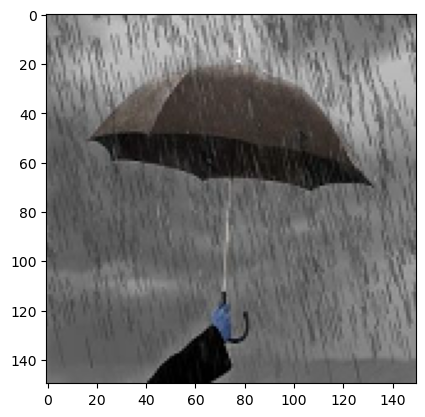

In [12]:
# Display some images
idx = 200
image = train_set[idx]
#image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [13]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  ./weather_data/weather_data/shine131.jpg


In [14]:
X_train[0]

array([[[216, 205, 201],
        [224, 213, 209],
        [232, 221, 217],
        ...,
        [200, 189, 181],
        [196, 185, 177],
        [194, 183, 175]],

       [[216, 205, 201],
        [221, 210, 206],
        [229, 218, 214],
        ...,
        [201, 190, 182],
        [197, 186, 178],
        [196, 185, 177]],

       [[215, 204, 200],
        [218, 207, 203],
        [222, 211, 207],
        ...,
        [198, 187, 179],
        [194, 183, 175],
        [193, 182, 174]],

       ...,

       [[ 18,  55,  39],
        [ 13,  54,  37],
        [  7,  52,  35],
        ...,
        [136, 143, 162],
        [136, 143, 162],
        [137, 142, 160]],

       [[  5,  45,  29],
        [  6,  49,  33],
        [ 23,  67,  54],
        ...,
        [128, 135, 154],
        [135, 142, 161],
        [136, 141, 159]],

       [[ 14,  60,  48],
        [ 18,  65,  55],
        [ 13,  60,  51],
        ...,
        [133, 140, 159],
        [126, 133, 152],
        [130, 135, 153]]

<AxesSubplot:ylabel='count'>

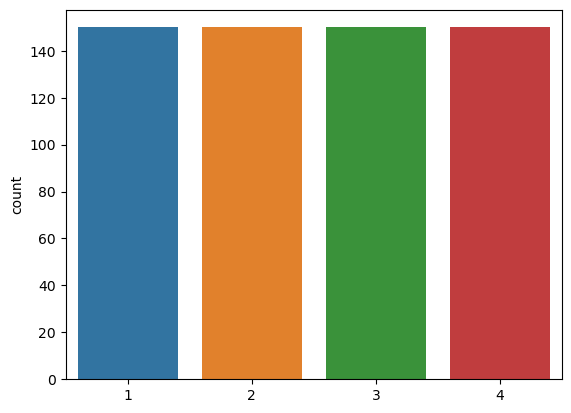

In [15]:
sns.countplot(y_train)

<AxesSubplot:ylabel='count'>

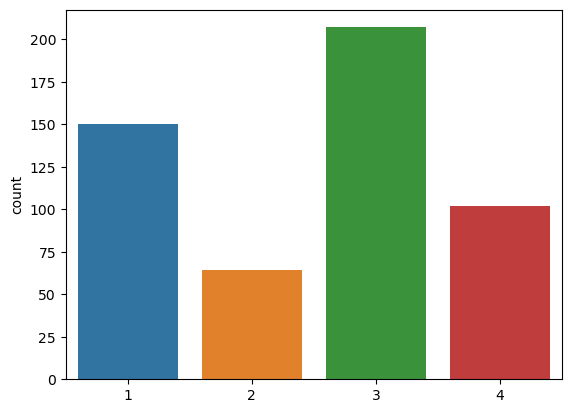

In [16]:
sns.countplot(y_test)

In [17]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
print(X_train)

[[[[216 205 201]
   [224 213 209]
   [232 221 217]
   ...
   [200 189 181]
   [196 185 177]
   [194 183 175]]

  [[216 205 201]
   [221 210 206]
   [229 218 214]
   ...
   [201 190 182]
   [197 186 178]
   [196 185 177]]

  [[215 204 200]
   [218 207 203]
   [222 211 207]
   ...
   [198 187 179]
   [194 183 175]
   [193 182 174]]

  ...

  [[ 18  55  39]
   [ 13  54  37]
   [  7  52  35]
   ...
   [136 143 162]
   [136 143 162]
   [137 142 160]]

  [[  5  45  29]
   [  6  49  33]
   [ 23  67  54]
   ...
   [128 135 154]
   [135 142 161]
   [136 141 159]]

  [[ 14  60  48]
   [ 18  65  55]
   [ 13  60  51]
   ...
   [133 140 159]
   [126 133 152]
   [130 135 153]]]


 [[[ 59  51  51]
   [ 61  54  51]
   [ 63  56  53]
   ...
   [ 47  42  39]
   [ 47  42  39]
   [ 44  39  38]]

  [[ 67  59  59]
   [ 67  60  58]
   [ 70  64  62]
   ...
   [ 52  47  45]
   [ 50  45  43]
   [ 45  41  37]]

  [[ 70  65  64]
   [ 71  66  65]
   [ 73  68  67]
   ...
   [ 55  50  49]
   [ 52  47  46]
   [ 50  45

In [19]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

[0. 1. 0. 0. 0.]


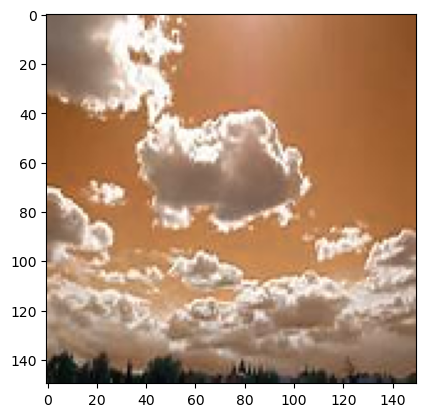

In [20]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [43]:
# Define your model here
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
from keras import layers
#arranging the Keras layers in a sequential order 
Model_1 = Sequential([
   layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dense(64, activation='relu'),
   layers.Dense(5, activation='softmax')
])
print(Model_1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 124)     3472      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 124)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        71488     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 32)       0

In [44]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       7385

In [45]:

model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [46]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split = 0.2)

Epoch 1/20
8/8 [==============================] - 15s 2s/step - loss: 2.3017 - accuracy: 0.6583 - val_loss: 0.8638 - val_accuracy: 0.8833
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 0.3061 - accuracy: 0.8833 - val_loss: 8.6291 - val_accuracy: 0.0167
Epoch 3/20
8/8 [==============================] - 12s 2s/step - loss: 0.3880 - accuracy: 0.8687 - val_loss: 2.6296 - val_accuracy: 0.5083
Epoch 4/20
8/8 [==============================] - 13s 2s/step - loss: 0.0890 - accuracy: 0.9708 - val_loss: 4.6549 - val_accuracy: 0.3750
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 0.5906 - accuracy: 0.8354 - val_loss: 1.9230 - val_accuracy: 0.5917
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: 0.1122 - accuracy: 0.9667 - val_loss: 4.8838 - val_accuracy: 0.2167
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: 0.2085 - accuracy: 0.9271 - val_loss: 1.7111 - val_accuracy: 0.8583
Epoch 8/20
8/8 [==================

In [47]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

17/17 [==============================] - 4s 237ms/step - loss: 0.9976 - accuracy: 0.8604
Test accuracy: 0.860


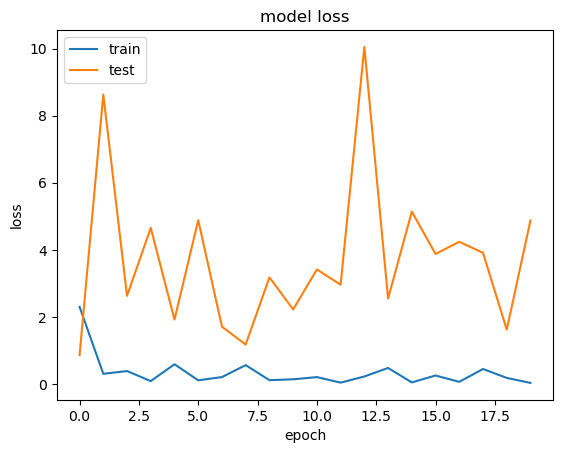

In [48]:
#plot the learning curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

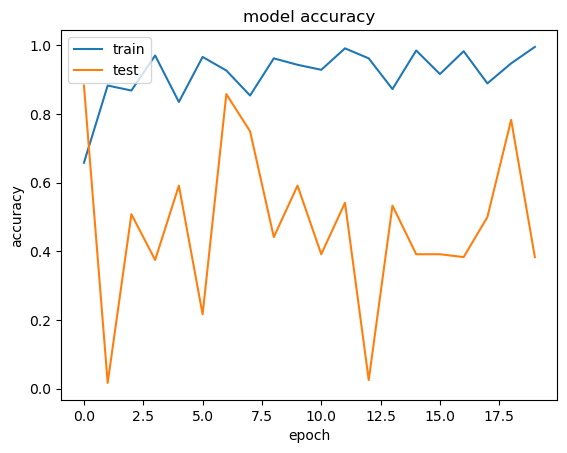

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#add 4 laeye



from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
#arranging the Keras layers in a sequential order 
inputs = Input(shape=(150, 150, 3))

x=inputs

x=Conv2D(filters=32,kernel_size=3, activation='relu')(x)
x=MaxPooling2D(pool_size=2)(x)
x=Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x=MaxPooling2D(pool_size=2)(x)
x=Conv2D(filters=64,kernel_size=3, activation="relu")(x)
x=MaxPooling2D(pool_size=3)(x)
x=Flatten()(x)

outputs=Dense(5,activation="softmax")(x)
model= Model(inputs=inputs, outputs=outputs)
# ...
# 13.) Model Summary
#print(model.summary())


In [21]:
# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

In [22]:
# 14.) Compile and Train the Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), ....)

### Plot learning Curves

***Type your code here***

In [23]:
# Plot Accuracy Over Training Period

### Evaluating the model out-of-sample

In [24]:
# Type your code here
#test_loss, test_acc = model.evaluate(X_test, y_test)
#print(f"Test accuracy: {test_acc:.3f}")

### Comment on your results